## EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

### Q1

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Import image
ew = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert ew is not None

256


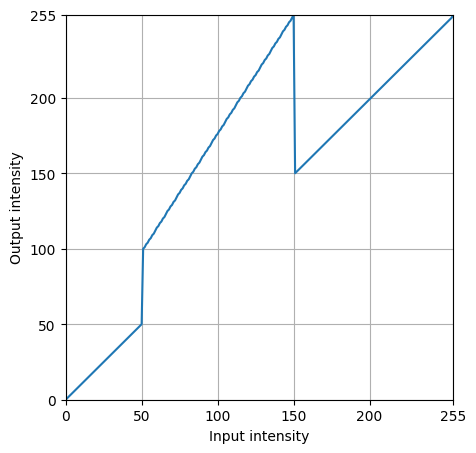

In [4]:
#Define Transformation Function
t1 = np.linspace(0, 50, 51).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 255, 105).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

# Plot the figure
plt.figure(figsize=(5, 5))
plt.plot(transform)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.ylim(0, 255)
plt.yticks([0, 50, 100, 150, 200, 255])
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


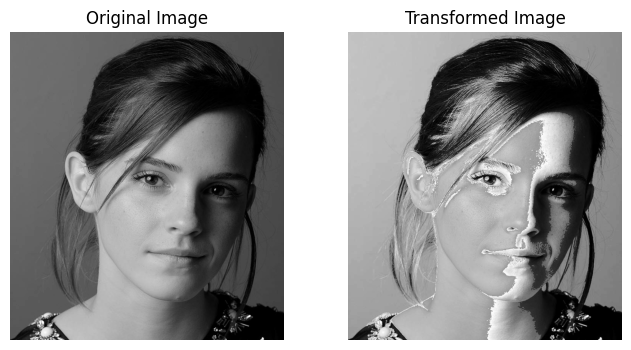

In [5]:
# Implement the transformation
ew_transformed = transform[ew]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(ew, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(ew_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()

### Q2

### Approach 1

256


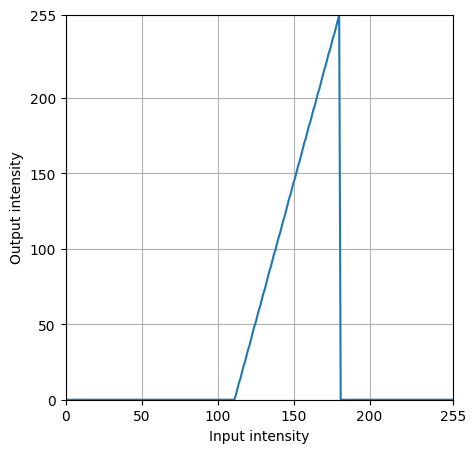

In [6]:
#Define Transformation Function
t1 = np.linspace(0, 0, 111).astype('uint8')
t2 = np.linspace(0, 255, 70).astype('uint8')
t3 = np.linspace(0, 0, 75).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

# Plot the figure
plt.figure(figsize=(5, 5))
plt.plot(transform)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.ylim(0, 255)
plt.yticks([0, 50, 100, 150, 200, 255])
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


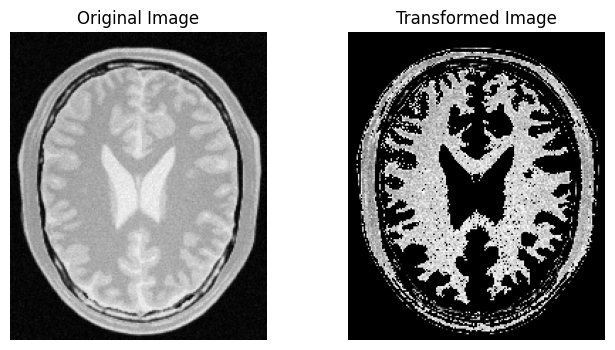

In [7]:
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

# Implement the transformation
transformed_brain = transform[brain]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(transformed_brain, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()  

### Approach 2

256


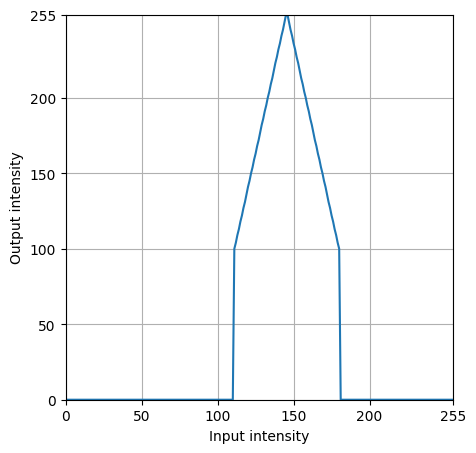

In [8]:
#Define Transformation Function
t1 = np.linspace(0, 0, 111).astype('uint8')
t2 = np.linspace(100, 255, 35).astype('uint8')
t3 = np.linspace(255, 100, 35).astype('uint8')
t4 = np.linspace(0, 0, 75).astype('uint8')

transform1 = np.concatenate((t1, t2, t3, t4), axis=0).astype('uint8')
print(len(transform))

# Plot the figure
plt.figure(figsize=(5, 5))
plt.plot(transform1)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.ylim(0, 255)
plt.yticks([0, 50, 100, 150, 200, 255])
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

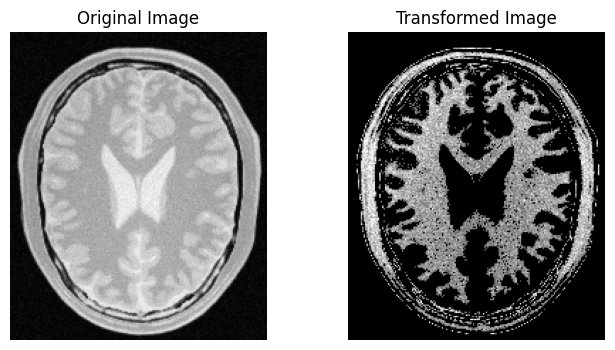

In [9]:
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

# Implement the transformation
transformed_brain = transform1[brain]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(transformed_brain, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()  

### Q3

In [10]:
# Load the image
img = cv.imread('a1images/highlights_and_shadows.jpg')
assert img is not None

# Convert to Lab color space
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)


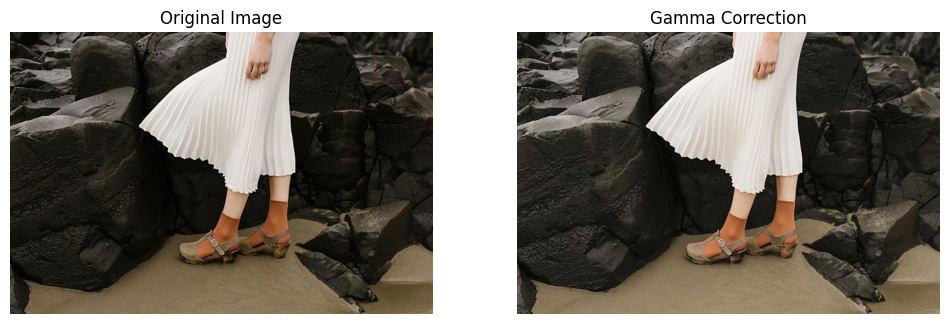

In [11]:
# split the Lab channels
L, a, b = cv.split(img_lab)

# Gamma correction
gamma = 0.8
t = np.array([(i/255.0)**(gamma)*255 for i in range(256)], dtype='uint8')

# Apply the transformation to the L channel
L_corrected = t[L]

# Merge the corrected L channel with the original a and b channels
img_lab_corrected = cv.merge((L_corrected, a, b))

# Plot the original and corrected images
fig, ax = plt.subplots(1, 2, figsize= (12, 8))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(img_lab_corrected, cv.COLOR_Lab2RGB))
ax[1].set_title('Gamma Correction')
for a in ax:
    a.axis('off')

plt.show()


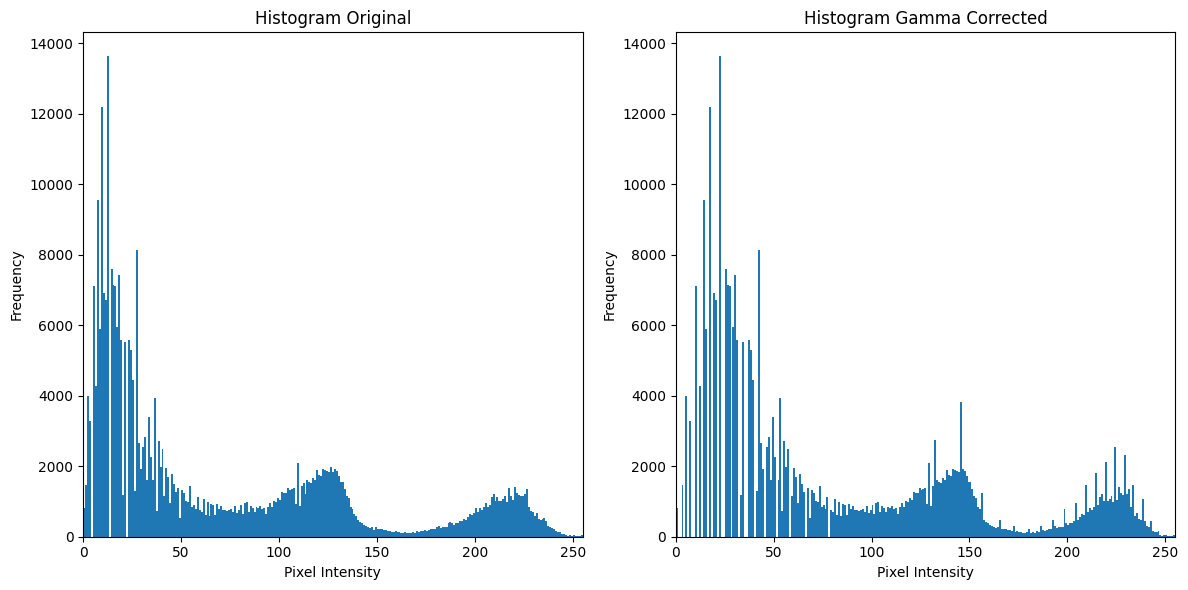

In [12]:
# calculate the histogram of the original image
hist_original, bins = np.histogram(L.ravel(), 256, [0,256])
# calculate the histogram of the corrected image
hist_gamma_corrected, bins = np.histogram(L_corrected.ravel(), 256, [0,256])

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(12, 6))

# Original histogram
plt.subplot(1, 2, 1)
plt.bar(bin_centers, hist_original, width=1.0)
plt.title("Histogram Original")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 255)

# Gamma corrected histogram
plt.subplot(1, 2, 2)
plt.bar(bin_centers, hist_gamma_corrected, width=1.0)
plt.title("Histogram Gamma Corrected")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

### Q4

In [13]:
# Load the image
spider = cv.imread('a1images/spider.png')
assert spider is not None

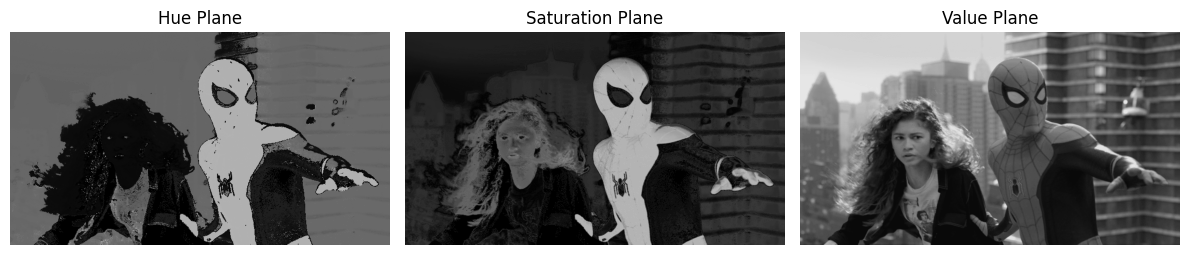

In [14]:
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)
# Convert to HSV color space
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)

# Split the HSV planes
h, s, v = cv.split(spider_hsv)

# Display the HSV channels
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(h, cmap='grey', vmin=0, vmax=255)
ax[0].set_title('Hue Plane')
ax[1].imshow(s, cmap='grey', vmin=0, vmax=255)
ax[1].set_title('Saturation Plane')
ax[2].imshow(v, cmap='grey', vmin=0, vmax=255)
ax[2].set_title('Value Plane')
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

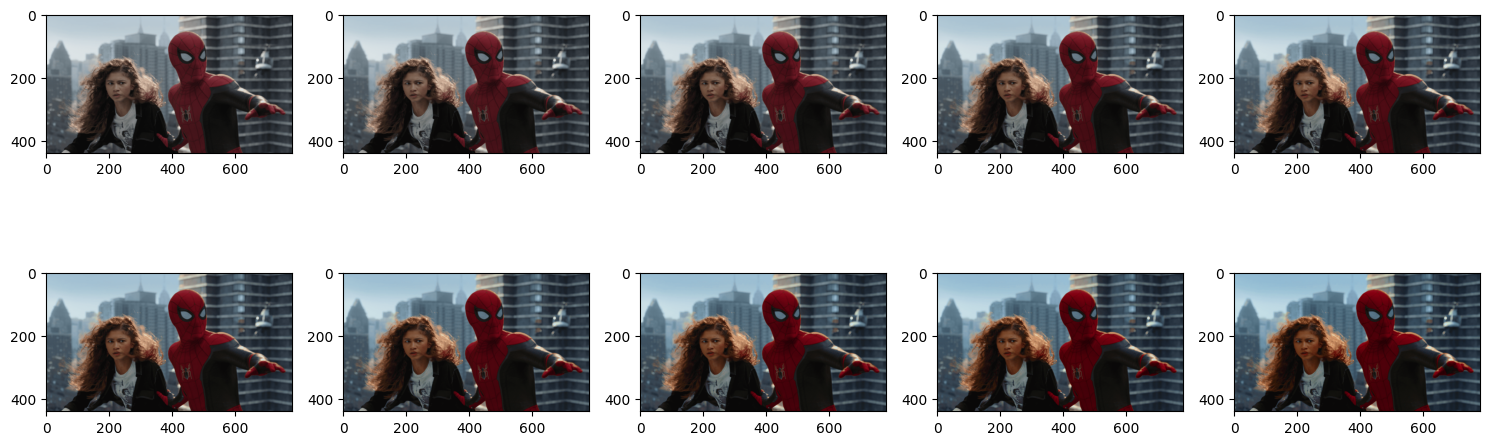

In [15]:
# Define the transformation function
a = np.arange(0, 1, 0.1)
sigma = 70

plt.figure(figsize=(15, 6))

x = np.arange(0, 256)
for idx, a_i in enumerate(a):
    f = np.minimum(x + a_i * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')
    s_enhanced = f[s]
    spider_hsv_enhanced = cv.merge((h, s_enhanced, v))

    # Convert back to RGB color space
    spider_enhanced = cv.cvtColor(spider_hsv_enhanced, cv.COLOR_HSV2RGB)

    # Plot each enhanced image
    plt.subplot(2, 5, idx + 1)
    plt.imshow(spider_enhanced)

plt.tight_layout()
plt.show()

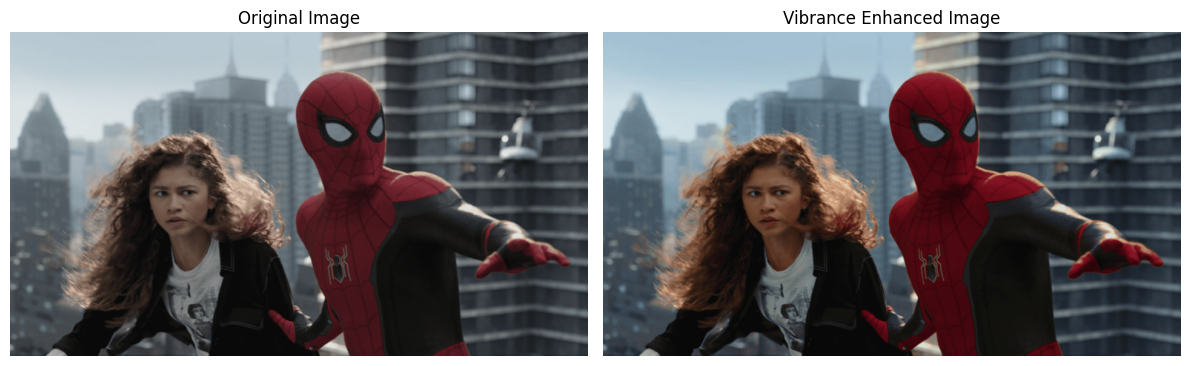

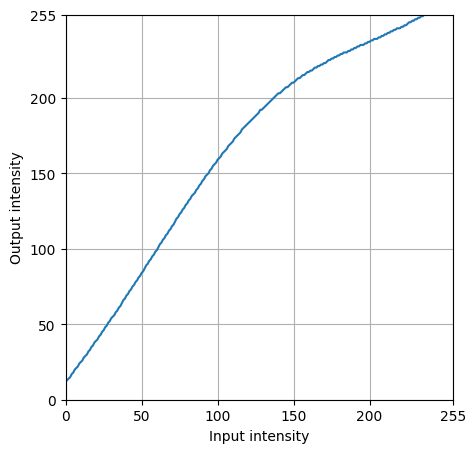

In [16]:
# Plot the final visually pleasing output

a = 0.5
sigma = 70

x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')
s_enhanced = f[s]
spider_hsv_enhanced = cv.merge((h, s_enhanced, v))

# Convert back to BGR color space
spider_enhanced = cv.cvtColor(spider_hsv_enhanced, cv.COLOR_HSV2RGB)

# Plot Original vs Enhanced Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(spider_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(spider_enhanced)
ax[1].set_title('Vibrance Enhanced Image')
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(f)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.ylim(0, 255)
plt.yticks([0, 50, 100, 150, 200, 255])
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

### Q5

In [17]:
# Load the image
shell = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shell is not None

In [18]:
# Define custom Histogram equalization function
def Hist_equal(r):
    L = 256
    M, N = r.shape

    hist, bin = np.histogram(r, L, [0, L])
    cdf = hist.cumsum()

    s = np.array([((L-1)/(M*N))*cdf[k] for k in range(256)]).astype("uint8")
    return s[r]

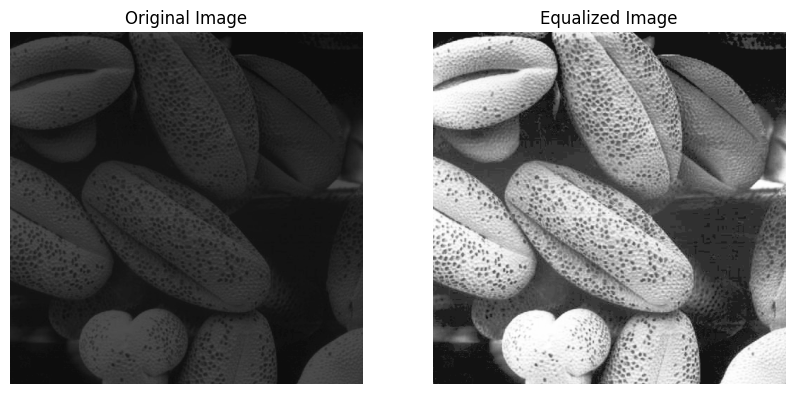

In [19]:
# Implement the Histogram Equalization
shell_equalized = Hist_equal(shell)

# Plot the original and equalized images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(shell, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(shell_equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized Image')
for a in ax:
    a.axis('off')
plt.show()

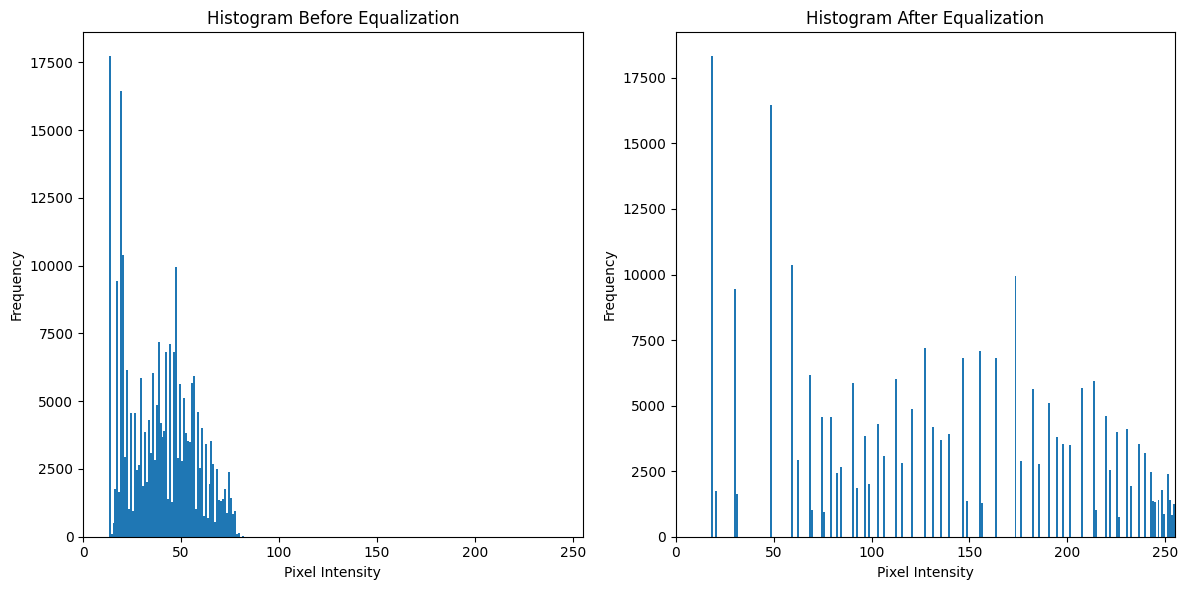

In [20]:
# Histogram of the original image
shell_hist, shell_bins = np.histogram(shell.ravel(), 256, [0, 256])
# Histogram of the equalized image
shell_equalized_hist, shell_equalized_bins = np.histogram(shell_equalized.ravel(), 256, [0, 256])

shell_bin_centers = (shell_bins[:-1] + shell_bins[1:]) / 2

plt.figure(figsize=(12, 6))

# Original histogram
plt.subplot(1, 2, 1)
plt.bar(shell_bin_centers, shell_hist, width=1.0)
plt.title("Histogram Before Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 255)

# Equalized histogram
plt.subplot(1, 2, 2)
plt.bar(shell_bin_centers, shell_equalized_hist, width=1.0)
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

### Q6

In [21]:
# Load the image
jlaw = cv.imread('a1images/jeniffer.jpg')
assert jlaw is not None

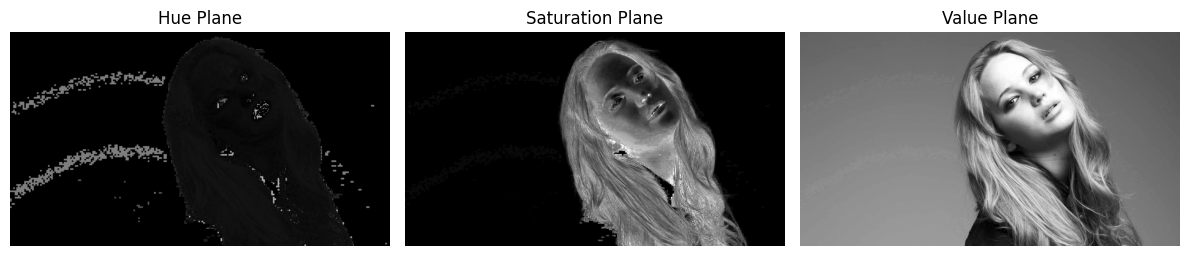

In [22]:
# Convert to HSV color space
jlaw_hsv = cv.cvtColor(jlaw, cv.COLOR_BGR2HSV)
# Split the HSV planes
h, s, v = cv.split(jlaw_hsv)

# Display the HSV channels
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(h, cmap='grey', vmin=0, vmax=255)
ax[0].set_title('Hue Plane')
ax[1].imshow(s, cmap='grey', vmin=0, vmax=255)
ax[1].set_title('Saturation Plane')
ax[2].imshow(v, cmap='grey', vmin=0, vmax=255)
ax[2].set_title('Value Plane')
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

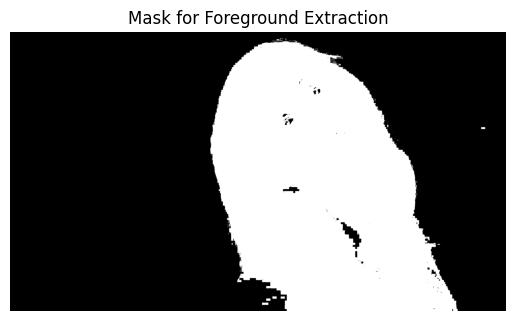

In [23]:
# Setting the threshold
ret, mask = cv.threshold(s, 12, 255, cv.THRESH_BINARY)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Mask for Foreground Extraction')
plt.axis('off')
plt.show()

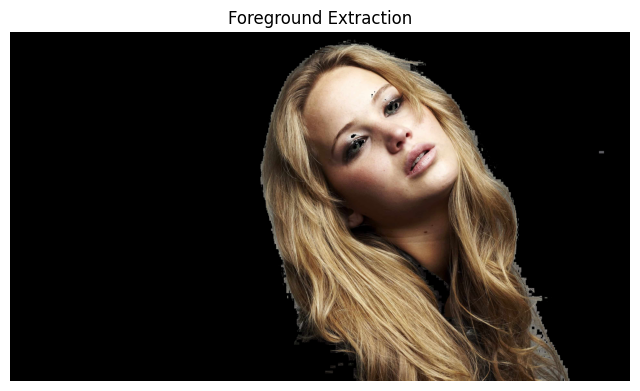

In [24]:
# Extract the foreground using the mask
foreground = cv.bitwise_and(jlaw, jlaw, mask=mask)

plt.figure(figsize=(8, 6))
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground Extraction')
plt.axis('off')
plt.show()

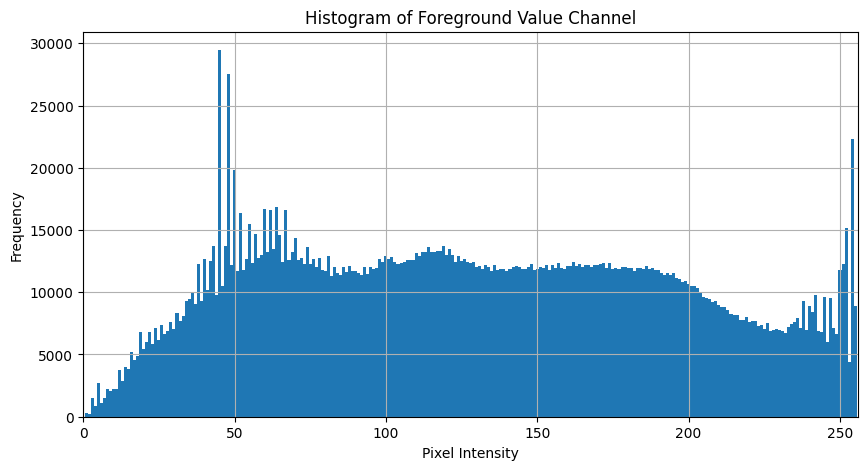

In [25]:
# Convert to HSV color space
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
# Split the HSV planes
hfg, sfg, vfg = cv.split(foreground_hsv)

# Compute the histogram of foreground
vfg_hist = cv.calcHist([vfg], [0], mask, [256], [0, 256])

x_values = np.arange(256)

plt.figure(figsize=(10, 5))
plt.bar(x_values, vfg_hist.flatten(), width=1.0)
plt.title('Histogram of Foreground Value Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

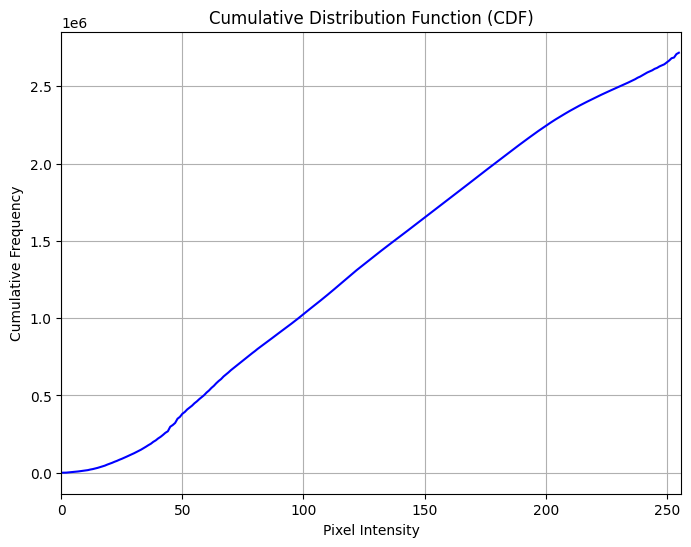

In [26]:
# Calculate the cdf
cdf = vfg_hist.cumsum()

# Plot the cdf
plt.figure(figsize=(8, 6))
plt.plot(x_values, cdf, color='blue')
plt.title('Cumulative Distribution Function (CDF)') 
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

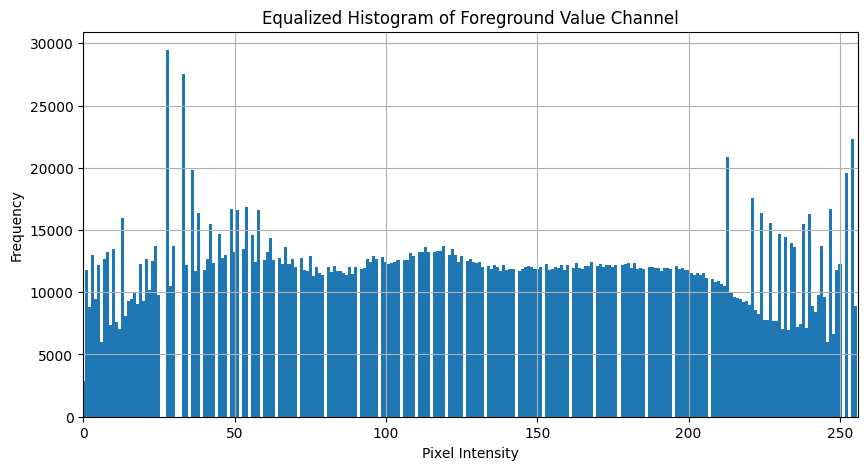

In [31]:
# Using formula given in slides for equalization
vfg_eq = cv.equalizeHist(vfg)

# Compute the histogram of foreground
vfg_hist_eq = cv.calcHist([vfg_eq], [0], mask, [256], [0, 256])

x_values = np.arange(256)

plt.figure(figsize=(10, 5))
plt.bar(x_values, vfg_hist_eq.flatten(), width=1.0)
plt.title('Equalized Histogram of Foreground Value Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid(True)
plt.show()


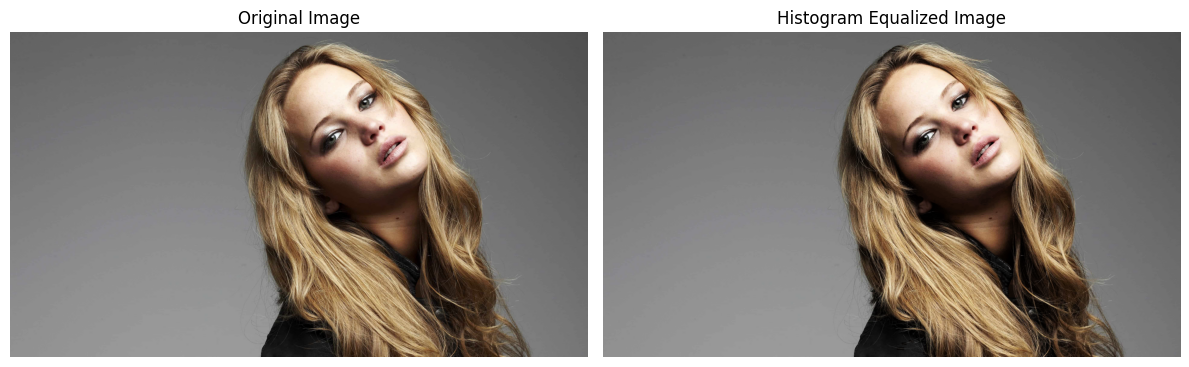

In [37]:
foreground_merged = cv.merge((hfg, sfg, vfg_eq))

foreground_final = cv.cvtColor(foreground_merged, cv.COLOR_HSV2RGB)

# Extract the Background
background = cv.bitwise_and(jlaw, jlaw, mask=~mask)

# Merge Equalized Foreground and Background
final_jlaw = cv.add(foreground_final, cv.cvtColor(background, cv.COLOR_BGR2RGB))

# Display the Original Image and Final Result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv.cvtColor(jlaw, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(final_jlaw)
ax[1].set_title('Histogram Equalized Image')
ax[1].axis('off')

plt.tight_layout()  
plt.show()

### Q7